### 첫번째 5000개 이벤트 저장

In [6]:
from dv import AedatFile
import numpy as np
import os
import numpy as np
from matplotlib import pyplot as plt
num_events = 5000
with AedatFile('./evnet_data/save.aedat4') as f:
    # events will be a named numpy array
    events = np.hstack([packet for packet in f['events'].numpy()])
    # Access information of all events by type
    timestamps, x, y, polarities = events['timestamp'], events['x'], events['y'], events['polarity']
    # Slice events
    first_events = events[:num_events]

timestamp = []
x = []
y = []
pol = []
for line in first_events:
    timestamp.append(int(line[0]))
    x.append(int(line[1]))
    y.append(int(line[2]))
    pol.append(int(line[3]))
            

img_size = (260,346)

### Polarity를 받아와서 하는 것 밖에 없다. 

Brightness incremet image: numevents =  5000


/tmp/ipykernel_5477/940666178.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.zeros(img_size, np.int)


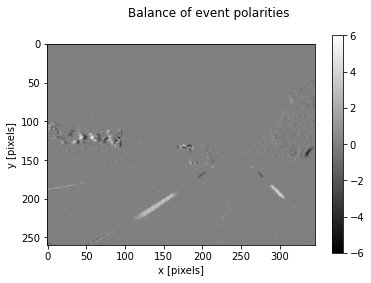

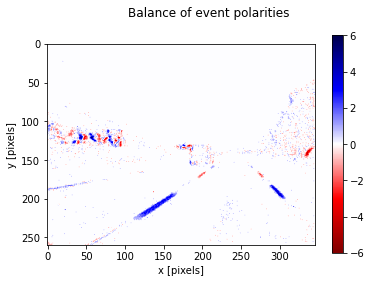

In [5]:
# %% Brightness incremet image (Balance of event polarities)
# Number of events used
print("Brightness incremet image: numevents = ", num_events)

# Compute image by accumulating polarities.
img = np.zeros(img_size, np.int)
for i in range(num_events):
    # Need to convert the polarity bit from {0,1} to {-1,+1} and accumulate
    img[y[i],x[i]] += (2*pol[i]-1)

# Display the image in grayscale
fig = plt.figure()
fig.suptitle('Balance of event polarities')
maxabsval = np.amax(np.abs(img))
plt.imshow(img, cmap='gray', clim=(-maxabsval,maxabsval))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

# Same plot as above, but changing the color map
fig = plt.figure()
fig.suptitle('Balance of event polarities')
maxabsval = np.amax(np.abs(img))
plt.imshow(img, cmap='seismic_r', clim=(-maxabsval,maxabsval))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

### Positive 인지, Negative인지에 따라서 나눈 것 

/tmp/ipykernel_5477/3715207803.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_pos = np.zeros(img_size, np.int)
/tmp/ipykernel_5477/3715207803.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20;

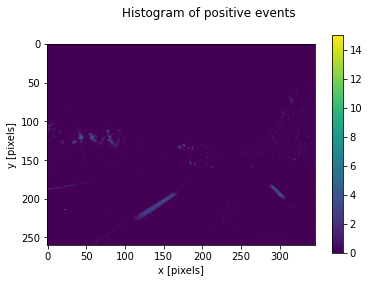

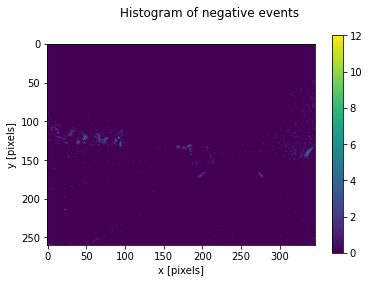

In [9]:
img_pos = np.zeros(img_size, np.int)
img_neg = np.zeros(img_size, np.int)
for i in range(num_events):
    if (pol[i] > 0):
        img_pos[y[i],x[i]] += 1 # count events
    else:
        img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

/tmp/ipykernel_5477/20076151.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.zeros(img_size, np.int)


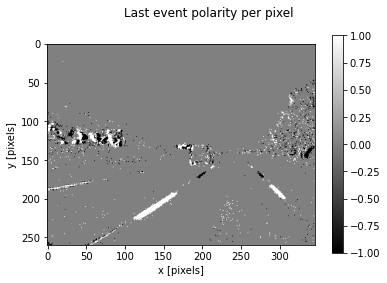

In [10]:
# %% Thresholded brightness increment image (Ternary image)

# What if we only use 3 values in the event accumulation image?
# Saturated signal: -1, 0, 1
# For example, store the polarity of the last event at each pixel
img = np.zeros(img_size, np.int)
for i in range(num_events):
    img[y[i],x[i]] = (2*pol[i]-1)  # no accumulation; overwrite the stored value

# Display the ternary image, 마지막 순간의 pixel 사실 이거만 해도 될거같은데?!, 정확도를 위해서는 위에거로 더하고,
fig = plt.figure()
fig.suptitle('Last event polarity per pixel')
plt.imshow(img, cmap='gray')
#plt.imshow(img, cmap='bwr')
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

In [29]:
from dv import AedatFile
import numpy as np
import os
import numpy as np
from matplotlib import pyplot as plt
num_events = 5000
with AedatFile('./evnet_data/save.aedat4') as f:
    # events will be a named numpy array
    events = np.hstack([packet for packet in f['events'].numpy()])
    # Access information of all events by type
    timestamps, x, y, polarities = events['timestamp'], events['x'], events['y'], events['polarity']
    # Slice events
    first_events = events[:num_events]

timestamp = []
x = []
y = []
pol = []
for line in first_events:
    timestamp.append(int(line[0]))
    x.append(int(line[1]))
    y.append(int(line[2]))
    pol.append(int(line[3]))
            

img_size = (260,346)

Time surface: numevents =  5000


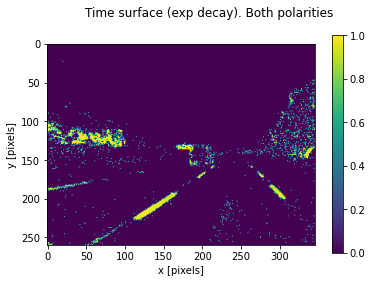

In [35]:
num_events = len(timestamp)
print("Time surface: numevents = ", num_events)

img = np.zeros(img_size, np.float32)
t_ref = timestamp[-1] # time of the last event in the packet
tau = 0.03 # decay parameter (in seconds)
for i in range(num_events):
    img[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / 50000*tau)

fig = plt.figure()
fig.suptitle('Time surface (exp decay). Both polarities')
plt.imshow(img)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()
